# Data Preprocessing

In [3]:
import pandas as pd
import sys,os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
example_path = "D:/Projects/CK_plus/datasets/images/S124/005/S124_005_00000043.png"
img = load_img(example_path)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='images/aug_examples/', save_prefix='ex', save_format='png'):
    i += 1
    if i > 19:
        break  # otherwise the generator would loop indefinitely

## Example of Augmentation

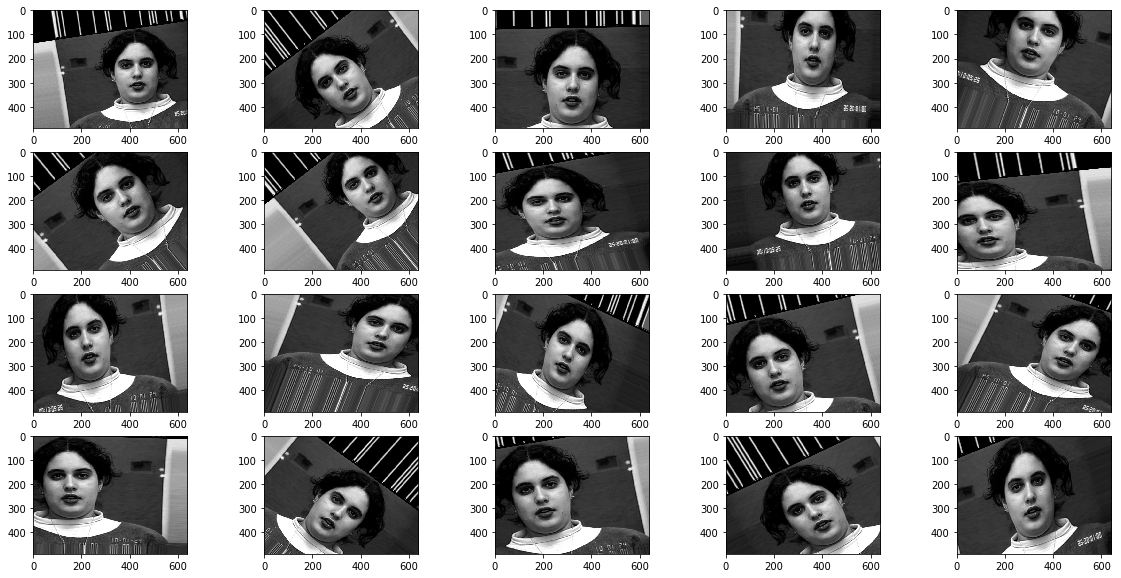

In [11]:
images = []
for img_path in glob.glob('images/aug_examples/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image)

## Move the images

In [12]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"
image_target_path = "D:/Projects/CK_plus/datasets/target_images"

# image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
# label_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
# image_target_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/images"

In [13]:
img_data = pd.read_csv("CSV/img_data.csv")
img_data = img_data[['img_id','em_id','emotion','img_num']]
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000006,S005_001_00000011,3,11
1,S005_001_00000007,S005_001_00000011,3,11
2,S005_001_00000008,S005_001_00000011,3,11
3,S005_001_00000009,S005_001_00000011,3,11
4,S005_001_00000010,S005_001_00000011,3,11


In [14]:
def img_id_to_path(img_id):
    img_ids = img_id.split("_")
    path = os.path.join(img_ids[0],img_ids[1],img_id +".png")
    return path

In [15]:
img_data["path"] = img_data.img_id.apply(img_id_to_path)
img_data.head()

,img_id,em_id,emotion,img_num,path
0,S005_001_00000006,S005_001_00000011,3,11,S005\001\S005_001_00000006.png
1,S005_001_00000007,S005_001_00000011,3,11,S005\001\S005_001_00000007.png
2,S005_001_00000008,S005_001_00000011,3,11,S005\001\S005_001_00000008.png
3,S005_001_00000009,S005_001_00000011,3,11,S005\001\S005_001_00000009.png
4,S005_001_00000010,S005_001_00000011,3,11,S005\001\S005_001_00000010.png


In [16]:
from shutil import copyfile
def move_images(path,orgin_path=image_path,target_path = image_target_path):
    src = os.path.join(image_path,path)
    print(src)
    head, tail = os.path.split(path)
    dst = os.path.join(target_path,tail)
    print(dst)
    copyfile(src, dst)

In [17]:
img_data.path.apply(move_images)

D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000006.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000006.png
D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000007.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000007.png
D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000008.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000008.png
D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000009.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000009.png
D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000010.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000010.png
D:/Projects/CK_plus/datasets/images\S005\001\S005_001_00000011.png
D:/Projects/CK_plus/datasets/target_images\S005_001_00000011.png
D:/Projects/CK_plus/datasets/images\S010\002\S010_002_00000006.png
D:/Projects/CK_plus/datasets/target_images\S010_002_00000006.png
D:/Projects/CK_plus/datasets/images\S010\002\S010_002_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S011\006\S011_006_00000012.png
D:/Projects/CK_plus/datasets/target_images\S011_006_00000012.png
D:/Projects/CK_plus/datasets/images\S011\006\S011_006_00000013.png
D:/Projects/CK_plus/datasets/target_images\S011_006_00000013.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000006.png
D:/Projects/CK_plus/datasets/target_images\S014_001_00000006.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000007.png
D:/Projects/CK_plus/datasets/target_images\S014_001_00000007.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000008.png
D:/Projects/CK_plus/datasets/target_images\S014_001_00000008.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000009.png
D:/Projects/CK_plus/datasets/target_images\S014_001_00000009.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000010.png
D:/Projects/CK_plus/datasets/target_images\S014_001_00000010.png
D:/Projects/CK_plus/datasets/images\S014\001\S014_001_00000011.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S022\005\S022_005_00000029.png
D:/Projects/CK_plus/datasets/target_images\S022_005_00000029.png
D:/Projects/CK_plus/datasets/images\S022\005\S022_005_00000030.png
D:/Projects/CK_plus/datasets/target_images\S022_005_00000030.png
D:/Projects/CK_plus/datasets/images\S022\005\S022_005_00000031.png
D:/Projects/CK_plus/datasets/target_images\S022_005_00000031.png
D:/Projects/CK_plus/datasets/images\S022\005\S022_005_00000032.png
D:/Projects/CK_plus/datasets/target_images\S022_005_00000032.png
D:/Projects/CK_plus/datasets/images\S022\006\S022_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S022_006_00000006.png
D:/Projects/CK_plus/datasets/images\S022\006\S022_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S022_006_00000007.png
D:/Projects/CK_plus/datasets/images\S022\006\S022_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S022_006_00000008.png
D:/Projects/CK_plus/datasets/images\S022\006\S022_006_00000009.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S032\003\S032_003_00000014.png
D:/Projects/CK_plus/datasets/target_images\S032_003_00000014.png
D:/Projects/CK_plus/datasets/images\S032\003\S032_003_00000015.png
D:/Projects/CK_plus/datasets/target_images\S032_003_00000015.png
D:/Projects/CK_plus/datasets/images\S032\003\S032_003_00000016.png
D:/Projects/CK_plus/datasets/target_images\S032_003_00000016.png
D:/Projects/CK_plus/datasets/images\S032\003\S032_003_00000017.png
D:/Projects/CK_plus/datasets/target_images\S032_003_00000017.png
D:/Projects/CK_plus/datasets/images\S032\004\S032_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S032_004_00000006.png
D:/Projects/CK_plus/datasets/images\S032\004\S032_004_00000007.png
D:/Projects/CK_plus/datasets/target_images\S032_004_00000007.png
D:/Projects/CK_plus/datasets/images\S032\004\S032_004_00000008.png
D:/Projects/CK_plus/datasets/target_images\S032_004_00000008.png
D:/Projects/CK_plus/datasets/images\S032\004\S032_004_00000009.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S035\005\S035_005_00000018.png
D:/Projects/CK_plus/datasets/target_images\S035_005_00000018.png
D:/Projects/CK_plus/datasets/images\S035\005\S035_005_00000019.png
D:/Projects/CK_plus/datasets/target_images\S035_005_00000019.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S035_006_00000006.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S035_006_00000007.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S035_006_00000008.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S035_006_00000009.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S035_006_00000010.png
D:/Projects/CK_plus/datasets/images\S035\006\S035_006_00000011.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S044\001\S044_001_00000024.png
D:/Projects/CK_plus/datasets/target_images\S044_001_00000024.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000006.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000006.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000007.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000007.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000008.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000008.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000009.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000009.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000010.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000010.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000011.png
D:/Projects/CK_plus/datasets/target_images\S044_003_00000011.png
D:/Projects/CK_plus/datasets/images\S044\003\S044_003_00000012.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000015.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000015.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000016.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000016.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000017.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000017.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000018.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000018.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000019.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000019.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000020.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000020.png
D:/Projects/CK_plus/datasets/images\S050\004\S050_004_00000021.png
D:/Projects/CK_plus/datasets/target_images\S050_004_00000021.png
D:/Projects/CK_plus/datasets/images\S050\006\S050_006_00000006.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S053\001\S053_001_00000020.png
D:/Projects/CK_plus/datasets/target_images\S053_001_00000020.png
D:/Projects/CK_plus/datasets/images\S053\001\S053_001_00000021.png
D:/Projects/CK_plus/datasets/target_images\S053_001_00000021.png
D:/Projects/CK_plus/datasets/images\S053\001\S053_001_00000022.png
D:/Projects/CK_plus/datasets/target_images\S053_001_00000022.png
D:/Projects/CK_plus/datasets/images\S053\001\S053_001_00000023.png
D:/Projects/CK_plus/datasets/target_images\S053_001_00000023.png
D:/Projects/CK_plus/datasets/images\S053\004\S053_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S053_004_00000006.png
D:/Projects/CK_plus/datasets/images\S053\004\S053_004_00000007.png
D:/Projects/CK_plus/datasets/target_images\S053_004_00000007.png
D:/Projects/CK_plus/datasets/images\S053\004\S053_004_00000008.png
D:/Projects/CK_plus/datasets/target_images\S053_004_00000008.png
D:/Projects/CK_plus/datasets/images\S053\004\S053_004_00000009.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S055\003\S055_003_00000008.png
D:/Projects/CK_plus/datasets/target_images\S055_003_00000008.png
D:/Projects/CK_plus/datasets/images\S055\003\S055_003_00000009.png
D:/Projects/CK_plus/datasets/target_images\S055_003_00000009.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S055_004_00000006.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000007.png
D:/Projects/CK_plus/datasets/target_images\S055_004_00000007.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000008.png
D:/Projects/CK_plus/datasets/target_images\S055_004_00000008.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000009.png
D:/Projects/CK_plus/datasets/target_images\S055_004_00000009.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000010.png
D:/Projects/CK_plus/datasets/target_images\S055_004_00000010.png
D:/Projects/CK_plus/datasets/images\S055\004\S055_004_00000011.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000008.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000009.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000010.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000011.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000011.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000012.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000012.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000013.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000013.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000014.png
D:/Projects/CK_plus/datasets/target_images\S057_006_00000014.png
D:/Projects/CK_plus/datasets/images\S057\006\S057_006_00000015.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000014.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000014.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000015.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000015.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000016.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000016.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000017.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000017.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000018.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000018.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000019.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000019.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000020.png
D:/Projects/CK_plus/datasets/target_images\S060_005_00000020.png
D:/Projects/CK_plus/datasets/images\S060\005\S060_005_00000021.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000010.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000010.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000011.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000011.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000012.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000012.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000013.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000013.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000014.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000014.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000015.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000015.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000016.png
D:/Projects/CK_plus/datasets/target_images\S063_002_00000016.png
D:/Projects/CK_plus/datasets/images\S063\002\S063_002_00000017.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000007.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000007.png
D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000008.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000008.png
D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000009.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000009.png
D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000010.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000010.png
D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000011.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000011.png
D:/Projects/CK_plus/datasets/images\S066\003\S066_003_00000012.png
D:/Projects/CK_plus/datasets/target_images\S066_003_00000012.png
D:/Projects/CK_plus/datasets/images\S066\004\S066_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S066_004_00000006.png
D:/Projects/CK_plus/datasets/images\S066\004\S066_004_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S068\005\S068_005_00000019.png
D:/Projects/CK_plus/datasets/target_images\S068_005_00000019.png
D:/Projects/CK_plus/datasets/images\S068\005\S068_005_00000020.png
D:/Projects/CK_plus/datasets/target_images\S068_005_00000020.png
D:/Projects/CK_plus/datasets/images\S068\005\S068_005_00000021.png
D:/Projects/CK_plus/datasets/target_images\S068_005_00000021.png
D:/Projects/CK_plus/datasets/images\S069\002\S069_002_00000006.png
D:/Projects/CK_plus/datasets/target_images\S069_002_00000006.png
D:/Projects/CK_plus/datasets/images\S069\002\S069_002_00000007.png
D:/Projects/CK_plus/datasets/target_images\S069_002_00000007.png
D:/Projects/CK_plus/datasets/images\S069\002\S069_002_00000008.png
D:/Projects/CK_plus/datasets/target_images\S069_002_00000008.png
D:/Projects/CK_plus/datasets/images\S069\002\S069_002_00000009.png
D:/Projects/CK_plus/datasets/target_images\S069_002_00000009.png
D:/Projects/CK_plus/datasets/images\S069\002\S069_002_00000010.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000016.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000016.png
D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000017.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000017.png
D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000018.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000018.png
D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000019.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000019.png
D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000020.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000020.png
D:/Projects/CK_plus/datasets/images\S071\005\S071_005_00000021.png
D:/Projects/CK_plus/datasets/target_images\S071_005_00000021.png
D:/Projects/CK_plus/datasets/images\S071\006\S071_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S071_006_00000006.png
D:/Projects/CK_plus/datasets/images\S071\006\S071_006_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000007.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000008.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000009.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000010.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000011.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000011.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000012.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000012.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000013.png
D:/Projects/CK_plus/datasets/target_images\S075_006_00000013.png
D:/Projects/CK_plus/datasets/images\S075\006\S075_006_00000014.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000008.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000008.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000009.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000009.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000010.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000010.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000011.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000011.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000012.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000012.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000013.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000013.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000014.png
D:/Projects/CK_plus/datasets/target_images\S078_004_00000014.png
D:/Projects/CK_plus/datasets/images\S078\004\S078_004_00000015.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S080\008\S080_008_00000007.png
D:/Projects/CK_plus/datasets/target_images\S080_008_00000007.png
D:/Projects/CK_plus/datasets/images\S080\008\S080_008_00000008.png
D:/Projects/CK_plus/datasets/target_images\S080_008_00000008.png
D:/Projects/CK_plus/datasets/images\S080\008\S080_008_00000009.png
D:/Projects/CK_plus/datasets/target_images\S080_008_00000009.png
D:/Projects/CK_plus/datasets/images\S081\001\S081_001_00000006.png
D:/Projects/CK_plus/datasets/target_images\S081_001_00000006.png
D:/Projects/CK_plus/datasets/images\S081\001\S081_001_00000007.png
D:/Projects/CK_plus/datasets/target_images\S081_001_00000007.png
D:/Projects/CK_plus/datasets/images\S081\001\S081_001_00000008.png
D:/Projects/CK_plus/datasets/target_images\S081_001_00000008.png
D:/Projects/CK_plus/datasets/images\S081\001\S081_001_00000009.png
D:/Projects/CK_plus/datasets/target_images\S081_001_00000009.png
D:/Projects/CK_plus/datasets/images\S081\001\S081_001_00000010.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000012.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000012.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000013.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000013.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000014.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000014.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000015.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000015.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000016.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000016.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000017.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000017.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000018.png
D:/Projects/CK_plus/datasets/target_images\S083_003_00000018.png
D:/Projects/CK_plus/datasets/images\S083\003\S083_003_00000019.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S088\001\S088_001_00000013.png
D:/Projects/CK_plus/datasets/target_images\S088_001_00000013.png
D:/Projects/CK_plus/datasets/images\S088\001\S088_001_00000014.png
D:/Projects/CK_plus/datasets/target_images\S088_001_00000014.png
D:/Projects/CK_plus/datasets/images\S088\001\S088_001_00000015.png
D:/Projects/CK_plus/datasets/target_images\S088_001_00000015.png
D:/Projects/CK_plus/datasets/images\S088\001\S088_001_00000016.png
D:/Projects/CK_plus/datasets/target_images\S088_001_00000016.png
D:/Projects/CK_plus/datasets/images\S088\001\S088_001_00000017.png
D:/Projects/CK_plus/datasets/target_images\S088_001_00000017.png
D:/Projects/CK_plus/datasets/images\S088\004\S088_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S088_004_00000006.png
D:/Projects/CK_plus/datasets/images\S088\004\S088_004_00000007.png
D:/Projects/CK_plus/datasets/target_images\S088_004_00000007.png
D:/Projects/CK_plus/datasets/images\S088\004\S088_004_00000008.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S089\003\S089_003_00000033.png
D:/Projects/CK_plus/datasets/target_images\S089_003_00000033.png
D:/Projects/CK_plus/datasets/images\S089\003\S089_003_00000034.png
D:/Projects/CK_plus/datasets/target_images\S089_003_00000034.png
D:/Projects/CK_plus/datasets/images\S089\003\S089_003_00000035.png
D:/Projects/CK_plus/datasets/target_images\S089_003_00000035.png
D:/Projects/CK_plus/datasets/images\S089\003\S089_003_00000036.png
D:/Projects/CK_plus/datasets/target_images\S089_003_00000036.png
D:/Projects/CK_plus/datasets/images\S090\002\S090_002_00000006.png
D:/Projects/CK_plus/datasets/target_images\S090_002_00000006.png
D:/Projects/CK_plus/datasets/images\S090\002\S090_002_00000007.png
D:/Projects/CK_plus/datasets/target_images\S090_002_00000007.png
D:/Projects/CK_plus/datasets/images\S090\002\S090_002_00000008.png
D:/Projects/CK_plus/datasets/target_images\S090_002_00000008.png
D:/Projects/CK_plus/datasets/images\S090\002\S090_002_00000009.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S093\001\S093_001_00000016.png
D:/Projects/CK_plus/datasets/target_images\S093_001_00000016.png
D:/Projects/CK_plus/datasets/images\S093\001\S093_001_00000017.png
D:/Projects/CK_plus/datasets/target_images\S093_001_00000017.png
D:/Projects/CK_plus/datasets/images\S093\001\S093_001_00000018.png
D:/Projects/CK_plus/datasets/target_images\S093_001_00000018.png
D:/Projects/CK_plus/datasets/images\S093\001\S093_001_00000019.png
D:/Projects/CK_plus/datasets/target_images\S093_001_00000019.png
D:/Projects/CK_plus/datasets/images\S093\001\S093_001_00000020.png
D:/Projects/CK_plus/datasets/target_images\S093_001_00000020.png
D:/Projects/CK_plus/datasets/images\S093\004\S093_004_00000006.png
D:/Projects/CK_plus/datasets/target_images\S093_004_00000006.png
D:/Projects/CK_plus/datasets/images\S093\004\S093_004_00000007.png
D:/Projects/CK_plus/datasets/target_images\S093_004_00000007.png
D:/Projects/CK_plus/datasets/images\S093\004\S093_004_00000008.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000008.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000008.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000009.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000009.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000010.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000010.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000011.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000011.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000012.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000012.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000013.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000013.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000014.png
D:/Projects/CK_plus/datasets/target_images\S097_004_00000014.png
D:/Projects/CK_plus/datasets/images\S097\004\S097_004_00000015.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000008.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000008.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000009.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000009.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000010.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000010.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000011.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000011.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000012.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000012.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000013.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000013.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000014.png
D:/Projects/CK_plus/datasets/target_images\S100_005_00000014.png
D:/Projects/CK_plus/datasets/images\S100\005\S100_005_00000015.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S108\005\S108_005_00000022.png
D:/Projects/CK_plus/datasets/target_images\S108_005_00000022.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000006.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000007.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000008.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000009.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000010.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000011.png
D:/Projects/CK_plus/datasets/target_images\S108_006_00000011.png
D:/Projects/CK_plus/datasets/images\S108\006\S108_006_00000012.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S113\001\S113_001_00000008.png
D:/Projects/CK_plus/datasets/target_images\S113_001_00000008.png
D:/Projects/CK_plus/datasets/images\S113\001\S113_001_00000009.png
D:/Projects/CK_plus/datasets/target_images\S113_001_00000009.png
D:/Projects/CK_plus/datasets/images\S113\001\S113_001_00000010.png
D:/Projects/CK_plus/datasets/target_images\S113_001_00000010.png
D:/Projects/CK_plus/datasets/images\S113\001\S113_001_00000011.png
D:/Projects/CK_plus/datasets/target_images\S113_001_00000011.png
D:/Projects/CK_plus/datasets/images\S113\001\S113_001_00000012.png
D:/Projects/CK_plus/datasets/target_images\S113_001_00000012.png
D:/Projects/CK_plus/datasets/images\S113\003\S113_003_00000006.png
D:/Projects/CK_plus/datasets/target_images\S113_003_00000006.png
D:/Projects/CK_plus/datasets/images\S113\003\S113_003_00000007.png
D:/Projects/CK_plus/datasets/target_images\S113_003_00000007.png
D:/Projects/CK_plus/datasets/images\S113\003\S113_003_00000008.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000011.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000011.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000012.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000012.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000013.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000013.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000014.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000014.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000015.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000015.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000016.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000016.png
D:/Projects/CK_plus/datasets/images\S115\004\S115_004_00000017.png
D:/Projects/CK_plus/datasets/target_images\S115_004_00000017.png
D:/Projects/CK_plus/datasets/images\S115\008\S115_008_00000006.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S119\003\S119_003_00000021.png
D:/Projects/CK_plus/datasets/target_images\S119_003_00000021.png
D:/Projects/CK_plus/datasets/images\S119\003\S119_003_00000022.png
D:/Projects/CK_plus/datasets/target_images\S119_003_00000022.png
D:/Projects/CK_plus/datasets/images\S119\003\S119_003_00000023.png
D:/Projects/CK_plus/datasets/target_images\S119_003_00000023.png
D:/Projects/CK_plus/datasets/images\S119\003\S119_003_00000024.png
D:/Projects/CK_plus/datasets/target_images\S119_003_00000024.png
D:/Projects/CK_plus/datasets/images\S119\008\S119_008_00000006.png
D:/Projects/CK_plus/datasets/target_images\S119_008_00000006.png
D:/Projects/CK_plus/datasets/images\S119\008\S119_008_00000007.png
D:/Projects/CK_plus/datasets/target_images\S119_008_00000007.png
D:/Projects/CK_plus/datasets/images\S119\008\S119_008_00000008.png
D:/Projects/CK_plus/datasets/target_images\S119_008_00000008.png
D:/Projects/CK_plus/datasets/images\S119\008\S119_008_00000009.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S125\006\S125_006_00000018.png
D:/Projects/CK_plus/datasets/target_images\S125_006_00000018.png
D:/Projects/CK_plus/datasets/images\S125\006\S125_006_00000019.png
D:/Projects/CK_plus/datasets/target_images\S125_006_00000019.png
D:/Projects/CK_plus/datasets/images\S125\006\S125_006_00000020.png
D:/Projects/CK_plus/datasets/target_images\S125_006_00000020.png
D:/Projects/CK_plus/datasets/images\S125\006\S125_006_00000021.png
D:/Projects/CK_plus/datasets/target_images\S125_006_00000021.png
D:/Projects/CK_plus/datasets/images\S125\006\S125_006_00000022.png
D:/Projects/CK_plus/datasets/target_images\S125_006_00000022.png
D:/Projects/CK_plus/datasets/images\S125\007\S125_007_00000006.png
D:/Projects/CK_plus/datasets/target_images\S125_007_00000006.png
D:/Projects/CK_plus/datasets/images\S125\007\S125_007_00000007.png
D:/Projects/CK_plus/datasets/target_images\S125_007_00000007.png
D:/Projects/CK_plus/datasets/images\S125\007\S125_007_00000008.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000011.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000011.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000012.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000012.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000013.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000013.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000014.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000014.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000015.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000015.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000016.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000016.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000017.png
D:/Projects/CK_plus/datasets/target_images\S127_010_00000017.png
D:/Projects/CK_plus/datasets/images\S127\010\S127_010_00000018.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S130\007\S130_007_00000019.png
D:/Projects/CK_plus/datasets/target_images\S130_007_00000019.png
D:/Projects/CK_plus/datasets/images\S130\007\S130_007_00000020.png
D:/Projects/CK_plus/datasets/target_images\S130_007_00000020.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000006.png
D:/Projects/CK_plus/datasets/target_images\S130_009_00000006.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000007.png
D:/Projects/CK_plus/datasets/target_images\S130_009_00000007.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000008.png
D:/Projects/CK_plus/datasets/target_images\S130_009_00000008.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000009.png
D:/Projects/CK_plus/datasets/target_images\S130_009_00000009.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000010.png
D:/Projects/CK_plus/datasets/target_images\S130_009_00000010.png
D:/Projects/CK_plus/datasets/images\S130\009\S130_009_00000011.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000007.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000007.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000008.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000008.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000009.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000009.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000010.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000010.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000011.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000011.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000012.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000012.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000013.png
D:/Projects/CK_plus/datasets/target_images\S131_010_00000013.png
D:/Projects/CK_plus/datasets/images\S131\010\S131_010_00000014.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000014.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000014.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000015.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000015.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000016.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000016.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000017.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000017.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000018.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000018.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000019.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000019.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000020.png
D:/Projects/CK_plus/datasets/target_images\S133_003_00000020.png
D:/Projects/CK_plus/datasets/images\S133\003\S133_003_00000021.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000016.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000016.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000017.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000017.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000018.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000018.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000019.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000019.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000020.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000020.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000021.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000021.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000022.png
D:/Projects/CK_plus/datasets/target_images\S135_001_00000022.png
D:/Projects/CK_plus/datasets/images\S135\001\S135_001_00000023.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000008.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000008.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000009.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000009.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000010.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000010.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000011.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000011.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000012.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000012.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000013.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000013.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000014.png
D:/Projects/CK_plus/datasets/target_images\S137_005_00000014.png
D:/Projects/CK_plus/datasets/images\S137\005\S137_005_00000015.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000008.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000008.png
D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000009.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000009.png
D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000010.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000010.png
D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000011.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000011.png
D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000012.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000012.png
D:/Projects/CK_plus/datasets/images\S139\002\S139_002_00000013.png
D:/Projects/CK_plus/datasets/target_images\S139_002_00000013.png
D:/Projects/CK_plus/datasets/images\S147\002\S147_002_00000006.png
D:/Projects/CK_plus/datasets/target_images\S147_002_00000006.png
D:/Projects/CK_plus/datasets/images\S147\002\S147_002_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000007.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000007.png
D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000008.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000008.png
D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000009.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000009.png
D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000010.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000010.png
D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000011.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000011.png
D:/Projects/CK_plus/datasets/images\S155\002\S155_002_00000012.png
D:/Projects/CK_plus/datasets/target_images\S155_002_00000012.png
D:/Projects/CK_plus/datasets/images\S156\002\S156_002_00000006.png
D:/Projects/CK_plus/datasets/target_images\S156_002_00000006.png
D:/Projects/CK_plus/datasets/images\S156\002\S156_002_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000051.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000051.png
D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000052.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000052.png
D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000053.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000053.png
D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000054.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000054.png
D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000055.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000055.png
D:/Projects/CK_plus/datasets/images\S501\004\S501_004_00000056.png
D:/Projects/CK_plus/datasets/target_images\S501_004_00000056.png
D:/Projects/CK_plus/datasets/images\S501\006\S501_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S501_006_00000006.png
D:/Projects/CK_plus/datasets/images\S501\006\S501_006_00000007.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000017.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000017.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000018.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000018.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000019.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000019.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000020.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000020.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000021.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000021.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000022.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000022.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000023.png
D:/Projects/CK_plus/datasets/target_images\S502_004_00000023.png
D:/Projects/CK_plus/datasets/images\S502\004\S502_004_00000024.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000007.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000008.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000009.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000010.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000011.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000011.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000012.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000012.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000013.png
D:/Projects/CK_plus/datasets/target_images\S503_006_00000013.png
D:/Projects/CK_plus/datasets/images\S503\006\S503_006_00000014.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S505\002\S505_002_00000021.png
D:/Projects/CK_plus/datasets/target_images\S505_002_00000021.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000006.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000006.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000007.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000007.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000008.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000008.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000009.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000009.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000010.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000010.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000011.png
D:/Projects/CK_plus/datasets/target_images\S505_006_00000011.png
D:/Projects/CK_plus/datasets/images\S505\006\S505_006_00000012.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000024.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000024.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000025.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000025.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000026.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000026.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000027.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000027.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000028.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000028.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000029.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000029.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000030.png
D:/Projects/CK_plus/datasets/target_images\S506_006_00000030.png
D:/Projects/CK_plus/datasets/images\S506\006\S506_006_00000031.png
D:/Projec

D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000037.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000037.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000038.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000038.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000039.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000039.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000040.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000040.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000041.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000041.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000042.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000042.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000043.png
D:/Projects/CK_plus/datasets/target_images\S999_003_00000043.png
D:/Projects/CK_plus/datasets/images\S999\003\S999_003_00000044.png
D:/Projec

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
4212    None
4213    None
4214    None
4215    None
4216    None
4217    None
4218    None
4219    None
4220    None
4221    None
4222    None
4223    None
4224    None
4225    None
4226    None
4227    None
4228    None
4229    None
4230    None
4231    None
4232    None
4233    None
4234    None
4235    None
4236    None
4237    None
4238    None
4239    None
4240    None
4241    None
Name: path, Length: 4242, dtype: object